# 1. Header and Contributions
# Analysis of Electric Car Company Finances
# Spring 2025 Data Science Project
# Chukwuemeka Nsolo, Isatou Jawara, Ryan Selser, Spencer Zheng

[WRITE CONTRIBUTIONS HERE]

# 2. Introduction

# 3. Data Collection

In [ ]:
# Import modules here
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
%pip install scikit-posthocs
import scikit_posthocs as skph
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.set_option('display.max_rows', None)

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load dataframes here
BYD_BS_df = pd.read_csv('BYD_BalanceSheet.csv')
GENERALM_BS_df = pd.read_csv('GENERALM_BalanceSheet.csv')
TESLA_BS_df = pd.read_csv('TESLA_BalanceSheet.csv')
VOLKSW_BS_df = pd.read_csv('VOLKSW_BalanceSheet.csv')

BYD_CF_df = pd.read_csv('BYD_CashFlow.csv')
GENERALM_CF_df = pd.read_csv('GENERALM_CashFlow.csv')
TESLA_CF_df = pd.read_csv('TESLA_CashFlow.csv')
VOLKSW_CF_df = pd.read_csv('VOLKSW_CashFlow.csv')

BYD_IS_df = pd.read_csv('BYD_IncomeStatement.csv')
GENERALM_IS_df = pd.read_csv('GENERALM_IncomeStatement.csv')
TESLA_IS_df = pd.read_csv('TESLA_IncomeStatement.csv')
VOLKSW_IS_df = pd.read_csv('VOLKSW_IncomeStatement.csv')

# Balance Sheets

In [ ]:
def organize(df):
    df = df.transpose()
    df.columns = df.iloc[0]
    df = df[1:]
    df.reset_index(drop=True, inplace=True)
    df = df.rename_axis(None, axis=1)
    return df

BYD_BS_df = organize(BYD_BS_df)
BYD_BS_df.insert(0, 'Car', 'BYD')
GENERALM_BS_df = organize(GENERALM_BS_df)
GENERALM_BS_df.insert(0, 'Car', 'General Motors')
TESLA_BS_df = organize(TESLA_BS_df)
TESLA_BS_df.insert(0, 'Car', 'Tesla')
VOLKSW_BS_df = organize(VOLKSW_BS_df)
VOLKSW_BS_df.insert(0, 'Car', 'Volkswagen')

BYD_BS_df2 = BYD_BS_df.assign(Goodwill=BYD_BS_df['Goodwill'], Inventories=BYD_BS_df['Inventories'], Total_Equity=BYD_BS_df['Total equity'], Accounts_Payable=BYD_BS_df['Accounts payable'], Comprehensive_Income=BYD_BS_df['Other comprehensive income'])
GENERALM_BS_df2 = GENERALM_BS_df.assign(Goodwill=GENERALM_BS_df['Goodwill & intangible assets, net'], Total_Equity=GENERALM_BS_df['Total equity (deficit)'], Accounts_Payable=GENERALM_BS_df['Accounts payable (principally trade)'], Comprehensive_Income=GENERALM_BS_df['Accumulated other comprehensive income (loss)'])
TESLA_BS_df2 = TESLA_BS_df.assign(Goodwill=TESLA_BS_df['Goodwill'], Inventories=TESLA_BS_df['Inventory'], Total_Equity=TESLA_BS_df['Total Equity'], Accounts_Payable=TESLA_BS_df['Accounts payable'], Comprehensive_Income=TESLA_BS_df['Accumulated other comprehensive income (loss)'])
VOLKSW_BS_df2 = VOLKSW_BS_df.assign(Goodwill=VOLKSW_BS_df['Goodwill, net'], Inventories=VOLKSW_BS_df['Inventories'], Total_Equity=VOLKSW_BS_df['Total equity'], Accounts_Payable='', Comprehensive_Income='')

bs_common = BYD_BS_df2.columns.intersection(GENERALM_BS_df2.columns)
bs_common = bs_common.intersection(TESLA_BS_df2.columns)
bs_common = bs_common.intersection(VOLKSW_BS_df2.columns)
bs_df = pd.concat([BYD_BS_df2[bs_common], GENERALM_BS_df2[bs_common], TESLA_BS_df2[bs_common], VOLKSW_BS_df2[bs_common]])
bs_df.dropna(subset=['Report Date'], inplace=True)
bs_df

,Car,Report Date,Currency,Audit Status,Consolidated,Scale,Goodwill,Inventories,Cash & cash equivalents,Total current assets,Total assets,Total current liabilities,Total_Equity,Accounts_Payable,Comprehensive_Income
0,BYD,12/31/2023,CNY,Not Qualified,Yes,Billions,4.428,87.677,109.094,302.121,679.548,453.667,150.462,194.43,0.604
2,BYD,12/31/2022,CNY,Not Qualified,Yes,Billions,0.066,79.107,51.471,240.804,493.861,333.345,121.39,140.437,0.428
4,BYD,12/31/2021,CNY,Not Qualified,Yes,Billions,0.066,43.355,50.457,166.11,295.78,171.304,104.244,73.16,-0.124
6,BYD,12/31/2020,CNY,Not Qualified,Yes,Billions,0.066,31.396,14.445,111.605,201.017,106.431,64.454,42.983,-0.556
8,BYD,12/31/2019,CNY,Not Qualified,Yes,Billions,0.066,25.572,12.65,106.967,195.642,108.029,62.601,22.521,-0.047
10,BYD,12/31/2018,CNY,Not Qualified,Yes,Billions,0.066,26.33,13.052,115.211,194.571,116.569,60.694,25.142,-0.291
12,BYD,12/31/2017,CNY,Not Qualified,Yes,Billions,0.066,19.873,9.903,102.684,178.099,104.997,59.957,23.32,1.26
14,BYD,12/31/2016,CNY,Not Qualified,Yes,Billions,0.066,17.378,7.111,78.354,145.071,78.318,55.409,-,-
16,BYD,12/31/2015,CNY,Not Qualified,Yes,Billions,0.066,15.751,6.011,54.519,115.486,66.11,36.029,-,-
18,BYD,12/31/2014,CNY,Not Qualified,Yes,Billions,0.066,9.978,3.95,40.834,94.009,53.022,28.894,-,-


# Cash Flow

In [ ]:
BYD_CF_df = organize(BYD_CF_df)
BYD_CF_df.insert(0, 'Car', 'BYD')
GENERALM_CF_df = organize(GENERALM_CF_df)
GENERALM_CF_df.insert(0, 'Car', 'General Motors')
TESLA_CF_df = organize(TESLA_CF_df)
TESLA_CF_df.insert(0, 'Car', 'Tesla')
VOLKSW_CF_df = organize(VOLKSW_CF_df)
VOLKSW_CF_df.insert(0, 'Car', 'Volkswagen')

BYD_CF_df2 = BYD_CF_df.assign(Inventory=BYD_CF_df['Decrease (increase) in inventories'], CF_From_Operating_Activities=BYD_CF_df['Net cash flows from operating activities'], CF_From_Investing_Activities=BYD_CF_df['Net cash flows from (used in) investing activities'],
                             CF_From_Financing_Activities=BYD_CF_df['Net cash flows from (used in) financing activities'], Dividends_Paid=BYD_CF_df['Cash paid for dividends, profit distribution & interest'])
GENERALM_CF_df2 = GENERALM_CF_df.assign(Inventory=GENERALM_CF_df['Inventories'], CF_From_Operating_Activities=GENERALM_CF_df['Net cash flows from operating activities'], CF_From_Investing_Activities=GENERALM_CF_df['Net cash flows from (used in) investing activities'],
                                       CF_From_Financing_Activities=GENERALM_CF_df['Net cash flows from (used in) financing activities'], Dividends_Paid=GENERALM_CF_df['Dividends paid'])
TESLA_CF_df2 = TESLA_CF_df.assign(Inventory=TESLA_CF_df['Inventory'], CF_From_Operating_Activities=TESLA_CF_df['Net cash flows from operating activities'], CF_From_Investing_Activities=TESLA_CF_df['Net cash (used in) flows from investing activities'],
                                 CF_From_Financing_Activities=TESLA_CF_df['Net cash flows from financing activities'], Dividends_Paid='')
VOLKSW_CF_df2 = VOLKSW_CF_df.assign(Inventory=VOLKSW_CF_df['Change in inventories'], CF_From_Operating_Activities=VOLKSW_CF_df['Cash flows from operating activities'], CF_From_Investing_Activities=VOLKSW_CF_df['Cash flows from (used in) investing activities'],
                                   CF_From_Financing_Activities=VOLKSW_CF_df['Cash flows from (used in) financing activities'], Dividends_Paid=VOLKSW_CF_df['Dividends paid'])

cf_common = BYD_CF_df2.columns.intersection(GENERALM_CF_df2.columns)
cf_common = cf_common.intersection(TESLA_CF_df2.columns)
cf_common = cf_common.intersection(VOLKSW_CF_df2.columns)
cf_df = pd.concat([BYD_CF_df2[cf_common], GENERALM_CF_df2[cf_common], TESLA_CF_df2[cf_common], VOLKSW_CF_df2[cf_common]])
cf_df.dropna(subset=['Report Date'], inplace=True)
cf_df

,Car,Report Date,Currency,Audit Status,Consolidated,Scale,Inventory,CF_From_Operating_Activities,CF_From_Investing_Activities,CF_From_Financing_Activities,Dividends_Paid
0,BYD,12/31/2023,CNY,Not Qualified,Yes,Billions,-7.602,169.725,-125.664,12.817,0.028
2,BYD,12/31/2022,CNY,Not Qualified,Yes,Billions,-36.565,140.838,-120.596,-19.489,-1.633
4,BYD,12/31/2021,CNY,Not Qualified,Yes,Billions,-12.893,65.467,-45.404,16.063,-2.619
6,BYD,12/31/2020,CNY,Not Qualified,Yes,Billions,-6.702,45.393,-14.444,-28.907,-3.686
8,BYD,12/31/2019,CNY,Not Qualified,Yes,Billions,0.284,14.741,-20.881,6.61,-4.389
10,BYD,12/31/2018,CNY,Not Qualified,Yes,Billions,-6.585,12.523,-14.231,3.917,-4.12
12,BYD,12/31/2017,CNY,Not Qualified,Yes,Billions,-2.727,6.368,-15.964,11.168,-3.201
14,BYD,12/31/2016,CNY,Not Qualified,Yes,Billions,-1.985,-1.846,-13.421,16.27,-
16,BYD,12/31/2015,CNY,Not Qualified,Yes,Billions,-6.224,3.842,-10.736,8.75,-0.037
18,BYD,12/31/2014,CNY,Not Qualified,Yes,Billions,-1.918,0.038,-7.901,7.271,-0.124


# Income Statement

In [ ]:
BYD_IS_df = organize(BYD_IS_df)
BYD_IS_df.insert(0, 'Car', 'BYD')
GENERALM_IS_df = organize(GENERALM_IS_df)
GENERALM_IS_df.insert(0, 'Car', 'General Motors')
TESLA_IS_df = organize(TESLA_IS_df)
TESLA_IS_df.insert(0, 'Car', 'Tesla')
VOLKSW_IS_df = organize(VOLKSW_IS_df)
VOLKSW_IS_df.insert(0, 'Car', 'Volkswagen')

BYD_IS_df2 = BYD_IS_df.assign(Revenue=BYD_IS_df['Operating revenues'], Income_Tax_Expense=BYD_IS_df['Income tax expense'], Total_Full_Time_Employees=BYD_IS_df['Full-Time Employees (Period End)'], Deferred_Tax_Expense='')
GENERALM_IS_df2 = GENERALM_IS_df.assign(Revenue=GENERALM_IS_df['Total net sales & revenue'], Income_Tax_Expense=GENERALM_IS_df['Income tax expense (benefit)'], Total_Full_Time_Employees=GENERALM_IS_df['Number of full time employees'], Deferred_Tax_Expense=GENERALM_IS_df['Total deferred income tax expense (benefit)'])
TESLA_IS_df2 = TESLA_IS_df.assign(Revenue=TESLA_IS_df['Total revenues'], Income_Tax_Expense=TESLA_IS_df['Current income taxes (benefit)'], Total_Full_Time_Employees=TESLA_IS_df['Number of full time employees'], Deferred_Tax_Expense=TESLA_IS_df['Deferred income taxes (benefit)'])
VOLKSW_IS_df2 = VOLKSW_IS_df.assign(Revenue=VOLKSW_IS_df['Sales revenue'], Income_Tax_Expense=VOLKSW_IS_df['Income tax income or expense'], Total_Full_Time_Employees=VOLKSW_IS_df['Number of full time employees'], Deferred_Tax_Expense=VOLKSW_IS_df['Deferred income tax'])

is_common = BYD_IS_df2.columns.intersection(GENERALM_IS_df2.columns)
is_common = is_common.intersection(TESLA_IS_df2.columns)
is_common = is_common.intersection(VOLKSW_IS_df2.columns)
is_df = pd.concat([BYD_IS_df2[is_common], GENERALM_IS_df2[is_common], TESLA_IS_df2[is_common], VOLKSW_IS_df2[is_common]])
is_df.dropna(subset=['Report Date'], inplace=True)
is_df

,Car,Report Date,Currency,Audit Status,Consolidated,Scale,Revenue,Total number of employees,Income_Tax_Expense,Total_Full_Time_Employees,Deferred_Tax_Expense
0,BYD,12/31/2023,CNY,Not Qualified,Yes,Billions,602.315,703504,-5.925,703504,
2,BYD,12/31/2022,CNY,Not Qualified,Yes,Billions,424.061,-,-3.367,-,
4,BYD,12/31/2021,CNY,Not Qualified,Yes,Billions,216.142,-,-0.551,-,
6,BYD,12/31/2020,CNY,Not Qualified,Yes,Billions,156.598,-,-0.869,-,
8,BYD,12/31/2019,CNY,Not Qualified,Yes,Billions,127.739,-,-0.312,-,
10,BYD,12/31/2018,CNY,Not Qualified,Yes,Billions,130.055,-,-0.829,-,
12,BYD,12/31/2017,CNY,Not Qualified,Yes,Billions,105.915,-,-0.704,-,
14,BYD,12/31/2016,CNY,Not Qualified,Yes,Billions,100.208,194000,-1.088,-,
16,BYD,12/31/2015,CNY,Not Qualified,Yes,Billions,77.612,200000,-0.657,-,
18,BYD,12/31/2014,CNY,Not Qualified,Yes,Billions,55.366,190000,-0.134,-,


# Merge and Clean

In [ ]:
bs_df = bs_df.reset_index(drop=True)
cf_df = cf_df.reset_index(drop=True)
is_df = is_df.reset_index(drop=True)
main_df = bs_df.merge(cf_df, on=['Car', 'Report Date', 'Currency', 'Audit Status', 'Consolidated', 'Scale'])
main_df = main_df.merge(is_df, on=['Car', 'Report Date', 'Currency', 'Audit Status', 'Consolidated', 'Scale'])
main_df

,Car,Report Date,Currency,Audit Status,Consolidated,Scale,Goodwill,Inventories,Cash & cash equivalents,Total current assets,...,Inventory,CF_From_Operating_Activities,CF_From_Investing_Activities,CF_From_Financing_Activities,Dividends_Paid,Revenue,Total number of employees,Income_Tax_Expense,Total_Full_Time_Employees,Deferred_Tax_Expense
0,BYD,12/31/2023,CNY,Not Qualified,Yes,Billions,4.428,87.677,109.094,302.121,...,-7.602,169.725,-125.664,12.817,0.028,602.315,703504,-5.925,703504,
1,BYD,12/31/2022,CNY,Not Qualified,Yes,Billions,0.066,79.107,51.471,240.804,...,-36.565,140.838,-120.596,-19.489,-1.633,424.061,-,-3.367,-,
2,BYD,12/31/2021,CNY,Not Qualified,Yes,Billions,0.066,43.355,50.457,166.11,...,-12.893,65.467,-45.404,16.063,-2.619,216.142,-,-0.551,-,
3,BYD,12/31/2020,CNY,Not Qualified,Yes,Billions,0.066,31.396,14.445,111.605,...,-6.702,45.393,-14.444,-28.907,-3.686,156.598,-,-0.869,-,
4,BYD,12/31/2019,CNY,Not Qualified,Yes,Billions,0.066,25.572,12.65,106.967,...,0.284,14.741,-20.881,6.61,-4.389,127.739,-,-0.312,-,
5,BYD,12/31/2018,CNY,Not Qualified,Yes,Billions,0.066,26.33,13.052,115.211,...,-6.585,12.523,-14.231,3.917,-4.12,130.055,-,-0.829,-,
6,BYD,12/31/2017,CNY,Not Qualified,Yes,Billions,0.066,19.873,9.903,102.684,...,-2.727,6.368,-15.964,11.168,-3.201,105.915,-,-0.704,-,
7,BYD,12/31/2016,CNY,Not Qualified,Yes,Billions,0.066,17.378,7.111,78.354,...,-1.985,-1.846,-13.421,16.27,-,100.208,194000,-1.088,-,
8,BYD,12/31/2015,CNY,Not Qualified,Yes,Billions,0.066,15.751,6.011,54.519,...,-6.224,3.842,-10.736,8.75,-0.037,77.612,200000,-0.657,-,
9,BYD,12/31/2014,CNY,Not Qualified,Yes,Billions,0.066,9.978,3.95,40.834,...,-1.918,0.038,-7.901,7.271,-0.124,55.366,190000,-0.134,-,


In [ ]:
time2014 = pd.to_datetime("12/31/2014")
time2015 = pd.to_datetime("12/31/2015")
time2016 = pd.to_datetime("12/31/2016")
time2017 = pd.to_datetime("12/31/2017")
time2018 = pd.to_datetime("12/31/2018")
time2019 = pd.to_datetime("12/31/2019")
time2020 = pd.to_datetime("12/31/2020")
time2021 = pd.to_datetime("12/31/2021")
time2022 = pd.to_datetime("12/31/2022")
time2023 = pd.to_datetime("12/31/2023")
main_df['Report Date'] = pd.to_datetime(main_df['Report Date'])
main_df = main_df.replace('', np.nan)
main_df = main_df.replace('-', np.nan)
conversion_dict = {"EUR": {time2023: 1.0817,	time2022: 1.0534,	time2021: 1.1830,	time2020: 1.1410, time2019: 1.1194,	time2018: 1.1817,	time2017: 1.1301, time2016: 1.1072,	time2015: 1.1096,	time2014: 1.3297}, "CNY": {time2023: 1/7.0809,	time2022: 1/6.7290, time2021: 1/6.4508,	time2020: 1/6.9042, time2019: 1/6.9081,	time2018: 1/6.6090,	time2017: 1/6.7569, time2016: 1/6.6400,	time2015: 1/6.2827,	time2014: 1/6.1620}}
def convertmoney(r):
  monetarycolumns = ['Goodwill', 'Inventories', 'Cash & cash equivalents', 'Total current assets', 'Total assets', 'Total current liabilities', 'Total_Equity', 'Accounts_Payable', 'Comprehensive_Income', 'Inventory', 'CF_From_Operating_Activities', 'CF_From_Investing_Activities', 'CF_From_Financing_Activities', 'Dividends_Paid', 'Revenue', 'Income_Tax_Expense', 'Deferred_Tax_Expense']
  for thisstr in monetarycolumns:
    r = converthelper(r, thisstr)
  return r
def converthelper(r, thisstr):
  if(r[thisstr] != np.nan):
    r[thisstr] = float(r[thisstr])
  if (r['Currency']!="USD") & (thisstr in r.index) & (r[thisstr] != np.nan):
    r[thisstr] = float(r[thisstr])*(conversion_dict[r['Currency']][r['Report Date']])
  if (r['Scale']=='Millions'):
    r[thisstr] = r[thisstr]*0.001
    r['Scale']='Billions'
  return r
main_df = main_df.apply(convertmoney, axis=1)
main_df = main_df.drop(columns=['Audit Status', 'Consolidated', 'Scale'], axis=1)
# Add Liquidity column based on current assets / current liabilities
main_df['Liquidity'] = main_df['Total current assets'].astype(float).div(main_df['Total current liabilities'].astype(float)).replace(np.inf, np.nan)
main_df

,Car,Report Date,Currency,Goodwill,Inventories,Cash & cash equivalents,Total current assets,Total assets,Total current liabilities,Total_Equity,...,CF_From_Operating_Activities,CF_From_Investing_Activities,CF_From_Financing_Activities,Dividends_Paid,Revenue,Total number of employees,Income_Tax_Expense,Total_Full_Time_Employees,Deferred_Tax_Expense,Liquidity
0,BYD,2023-12-31,CNY,0.625344,12.382183,15.406799,42.667034,95.969156,64.069116,21.248994,...,23.969411,-17.746897,1.810081,0.003954,85.061927,703504,-0.836758,703504,NaN,0.665953
1,BYD,2022-12-31,CNY,0.009808,11.756130,7.649131,35.786001,73.392926,49.538564,18.039828,...,20.930004,-17.921831,-2.896270,-0.242681,63.019914,NaN,-0.500372,NaN,NaN,0.722387
2,BYD,2021-12-31,CNY,0.010231,6.720872,7.821821,25.750295,45.851677,26.555466,16.159856,...,10.148664,-7.038507,2.490079,-0.405996,33.506232,NaN,-0.085416,NaN,NaN,0.969680
3,BYD,2020-12-31,CNY,0.009559,4.547377,2.092205,16.164798,29.115176,15.415399,9.335477,...,6.574694,-2.092060,-4.186872,-0.533878,22.681556,NaN,-0.125865,NaN,NaN,1.048614
4,BYD,2019-12-31,CNY,0.009554,3.701741,1.831184,15.484287,28.320667,15.638019,9.061971,...,2.133872,-3.022684,0.956848,-0.635341,18.491191,NaN,-0.045164,NaN,NaN,0.990169
5,BYD,2018-12-31,CNY,0.009986,3.983961,1.974883,17.432441,29.440309,17.637918,9.183538,...,1.894840,-2.153276,0.592677,-0.623392,19.678469,NaN,-0.125435,NaN,NaN,0.988350
6,BYD,2017-12-31,CNY,0.009768,2.941142,1.465613,15.196910,26.358093,15.539227,8.873448,...,0.942444,-2.362622,1.652829,-0.473738,15.675088,NaN,-0.104190,NaN,NaN,0.977971
7,BYD,2016-12-31,CNY,0.009940,2.617169,1.070934,11.800301,21.848042,11.794880,8.344729,...,-0.278012,-2.021235,2.450301,NaN,15.091566,194000,-0.163855,NaN,NaN,1.000460
8,BYD,2015-12-31,CNY,0.010505,2.507043,0.956754,8.677639,18.381588,10.522546,5.734636,...,0.611521,-1.708819,1.392713,-0.005889,12.353288,200000,-0.104573,NaN,NaN,0.824671
9,BYD,2014-12-31,CNY,0.010711,1.619279,0.641026,6.626745,15.256248,8.604674,4.689062,...,0.006167,-1.282214,1.179974,-0.020123,8.985070,190000,-0.021746,NaN,NaN,0.770133


# 4. Exploratory Data Analysis

Summary Statistics of Revenue Overall:
Minimum: 4.046
Maximum: 348.6146028
Mean: 125.01182791477697
Variance: 10899.342714208382
Skewness: 0.48426820080425426
Kurtosis: -1.066059775845485


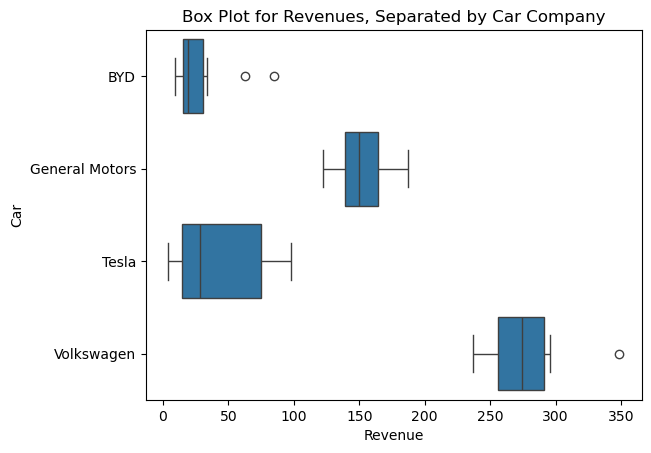

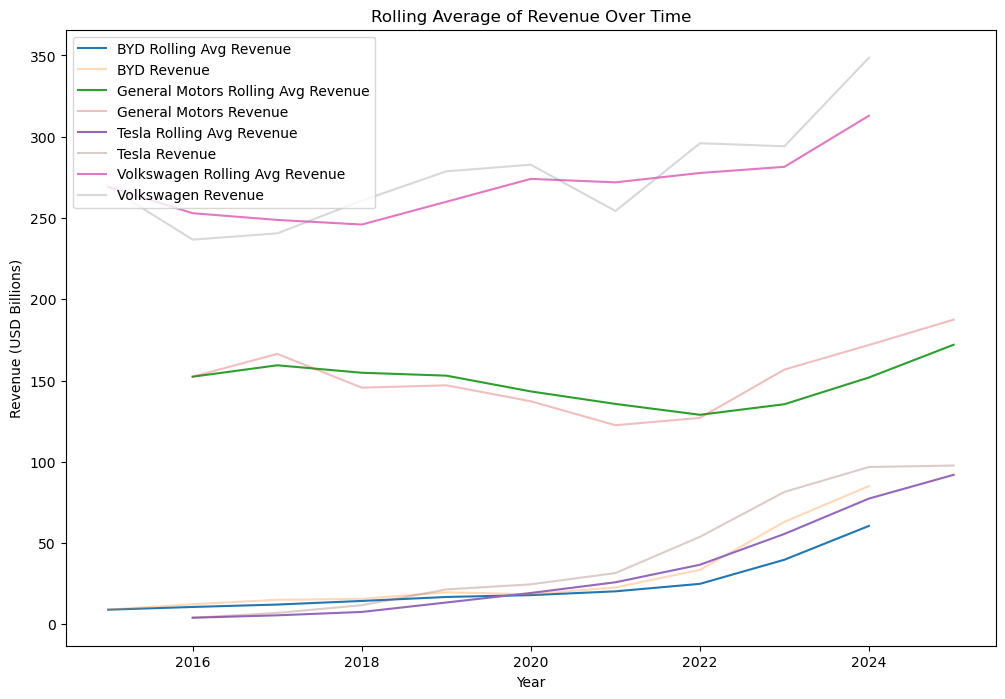

In [ ]:
import matplotlib.pyplot as plt
sumstats = scipy.stats.describe(main_df['Revenue'])
print("Summary Statistics of Revenue Overall:")
minr, maxr = sumstats.minmax
print("Minimum: "+str(minr))
print("Maximum: "+str(maxr))
print("Mean: "+str(sumstats.mean))
print("Variance: "+str(sumstats.variance))
print("Skewness: "+str(sumstats.skewness))
print("Kurtosis: "+str(sumstats.kurtosis))
g2 = sns.boxplot(data=main_df, x="Revenue", y="Car")
g2.set_title("Box Plot for Revenues, Separated by Car Company")
plt.figure(figsize=(12, 8))
for car in main_df['Car'].unique():
    car_data = main_df[main_df['Car'] == car].sort_values('Report Date')
    rolling_avg = car_data['Revenue'].rolling(window=3, min_periods=1).mean()
    plt.plot(car_data['Report Date'], rolling_avg, label=f'{car} Rolling Avg Revenue')
    plt.plot(car_data['Report Date'], car_data['Revenue'], label=f'{car} Revenue', alpha = 0.3)

plt.title('Rolling Average of Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (USD Billions)')
plt.legend()
plt.show()

This graph is time series revenue data for a number of automobile firms, tracking raw revenue along with rolling averages over time.  The revenue trends have Tesla and BYD growing strongly, while General Motors sees a decline before recovery. There may be correlations among firms due to economic drivers at the industry level. Potential outliers include Tesla's growth spike after 2022 and General Motors' decline from 2016-2020.

**Hypothesis Tests**

Let $\alpha = 0.05$.

Null Hypothesis: There is no difference between the means of liquidity of each car company.

Alternative Hypothesis: There is a difference in the mean of liquidity of at least one car company.

We will perform both ANOVA and Kruskal-Wallis Tests for completeness, using Tukey's and Dunn's Post Hoc Tests, respectively. The main difference is that ANOVA and Tukey's are used when the data meets the conditions for normality, while Kruskal-Wallis and Dunn's are used when they do not.

**ANOVA Test**

In [ ]:
# Split dataframe into groups based on car company
grouped_by_car = main_df.groupby('Car')
groupt3 = grouped_by_car['Liquidity']
t3totest = []
for i, t in groupt3:
  t3totest.append(t)

#for group, car in grouped_by_car:
#    display(car)

# Perform ANOVA test
anova_test_liq = scipy.stats.f_oneway(*t3totest)
display(f"P-value: {anova_test_liq.pvalue}")

'P-value: 0.0015359329837406658'

<b> Conclusion </b> <br>
The P-value is approximately 0.0015. 0.0015 < 0.05 so we reject the null hypothesis. There is sufficient evidence in favor of the alternative hypothesis.

**Tukey Post-Hoc Test**

In [ ]:
tukey_test_liq = pairwise_tukeyhsd(main_df['Liquidity'], main_df['Car'], alpha=0.05)
print(tukey_test_liq)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
           BYD General Motors   0.1142 0.7102 -0.1735 0.4019  False
           BYD          Tesla   0.4463  0.001  0.1586 0.7339   True
           BYD     Volkswagen   0.1895 0.3019 -0.0981 0.4772  False
General Motors          Tesla   0.3321 0.0183  0.0444 0.6197   True
General Motors     Volkswagen   0.0753 0.8943 -0.2123  0.363  False
         Tesla     Volkswagen  -0.2567 0.0945 -0.5444 0.0309  False
-------------------------------------------------------------------


**Conclusion**

The p-value is less than 0.05 when comparing BYD and Tesla as well as General Motors and Tesla, so we find statistically significant differences and reject the null hypothesis for BYD and Tesla as well as General Motors and Tesla.

**Kruskal-Wallis Test, Dunn's Post Hoc Test, and Frequency Polygon Plot**

H-statistic found by Kruskal-Wallis Test: 11.770243902439034
P-value found by Kruskal-Wallis Test: 0.008213115232858307
Table of p-values found by Dunn's Post Hoc Test:


,BYD,General Motors,Tesla,Volkswagen
BYD,1.000000,0.099981,0.001599,0.006998
General Motors,0.099981,1.000000,0.130774,0.292799
Tesla,0.001599,0.130774,1.000000,0.646195
Volkswagen,0.006998,0.292799,0.646195,1.000000


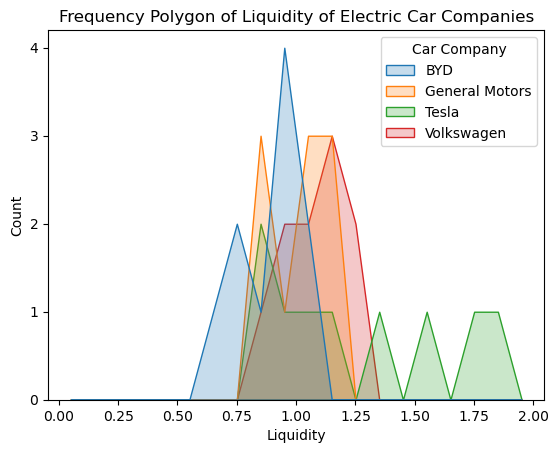

In [ ]:
t3result = scipy.stats.kruskal(*t3totest)
t3resultposthoc = skph.posthoc_dunn(main_df, val_col='Liquidity', group_col='Car')
print("H-statistic found by Kruskal-Wallis Test: "+str(t3result.statistic))
print("P-value found by Kruskal-Wallis Test: "+str(t3result.pvalue))
print("Table of p-values found by Dunn's Post Hoc Test:")
display(t3resultposthoc)
g3 = sns.histplot(data=main_df, x='Liquidity', hue='Car', element='poly', binwidth=0.1, binrange=(0, 2))
g3.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
g3.set_title("Frequency Polygon of Liquidity of Electric Car Companies")
#g3.set_ylabel("Count")
sns.move_legend(g3, "upper right", title='Car Company')

<b> Conclusion </b> <br>
The p-value found by the Kruskal-Wallis Test is 0.00823, which is less than 0.05. We reject the null hypothesis and find that there is a significant difference in liquidities between companies. <br>
The Dunn's Post Hoc Test finds significant differences when comparing BYD and Tesla, as well as BYD and Volkswagen.

**Overall Conclusion**

Both ANOVA and Kruskal-Wallis Tests reject the null hypothesis, however the post hoc tests differ on which companies differ.

Since both post hoc tests find significant differences between BYD and Tesla, we can be confident that differences exist there. Between Tukey's and Dunn's Tests, we prefer Dunn's Test since the data does not meet the conditions for normality, so we also find that there are significant differences between BYD and Volkswagen.

**Basic data exploration and  SUMMARY STATS**

In [ ]:
grouped_df = main_df.groupby('Car')
summary_stats = grouped_df[['Revenue', 'Goodwill', 'Inventories', 'Cash & cash equivalents', 'Total current assets', 'Total assets', 'Total current liabilities','Total_Equity']].describe()
revenue_comparison = grouped_df['Revenue'].describe()
cash_flow_comparison = grouped_df[['CF_From_Operating_Activities', 'CF_From_Investing_Activities', 'CF_From_Financing_Activities', 'Dividends_Paid']].describe()
print("Summary Statistics for Key Financial Metrics:")
print(summary_stats)
print("\nRevenue Comparison by Car Type:")
print(revenue_comparison)
print("\nCash Flow Comparison by Car Type:")
print(cash_flow_comparison)

Summary Statistics for Key Financial Metrics:
               Revenue                                                 \
                 count        mean        std         min         25%   
Car                                                                     
BYD               10.0   29.454430  24.954386    8.985070   15.237447   
General Motors    10.0  151.411800  20.152804  122.485000  139.324750   
Tesla             10.0   43.012800  36.822591    4.046000   14.184500   
Volkswagen        10.0  276.168282  32.674551  236.668803  255.906415   

                                                   Goodwill             ...  \
                       50%         75%         max    count       mean  ...   
Car                                                                     ...   
BYD              19.084830   30.800063   85.061927     10.0   0.071541  ...   
General Motors  149.702500  163.968750  187.442000     10.0   5.364600  ...   
Tesla            28.057000   74.552250   97.690

# GENERAL DATA VISUALIZATION

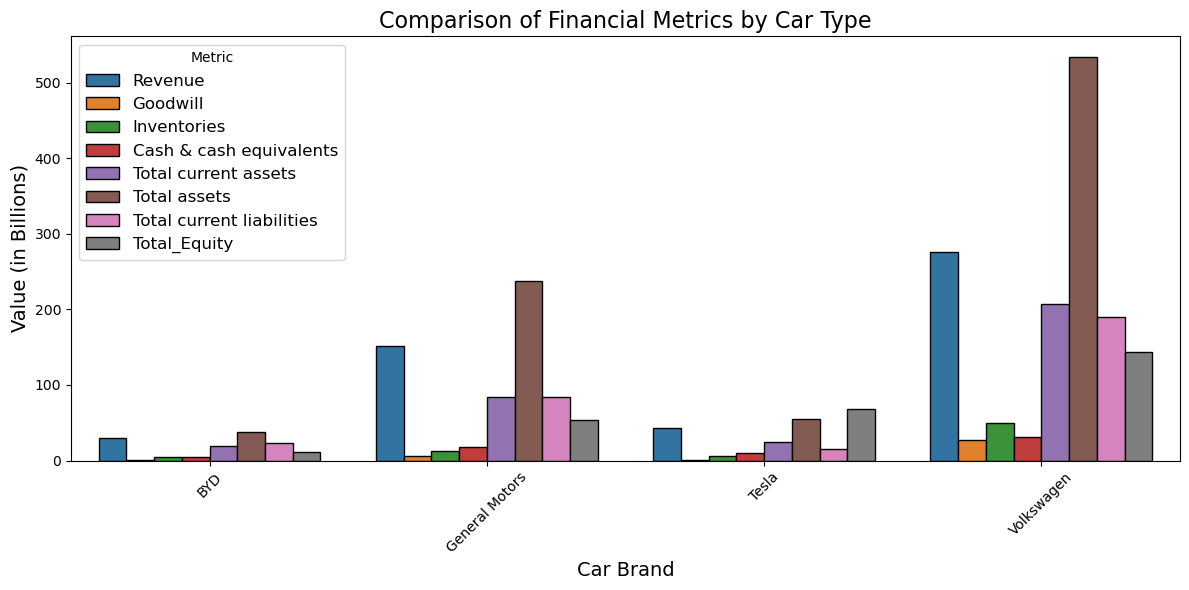

In [ ]:
metrics = ['Revenue', 'Goodwill', 'Inventories', 'Cash & cash equivalents', 'Total current assets', 'Total assets', 'Total current liabilities', 'Total_Equity']
df_melted = main_df.melt(id_vars=["Car"], value_vars=metrics, var_name="Metric", value_name="Value")

plt.figure(figsize=(12, 6))
sns.barplot(x="Car", y="Value", hue="Metric", data=df_melted, errorbar=None,edgecolor="black")
plt.title("Comparison of Financial Metrics by Car Type", fontsize=16)
plt.ylabel("Value (in Billions)", fontsize=14)
plt.xlabel("Car Brand", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", loc="upper left", fontsize=12)
plt.tight_layout()

plt.show()

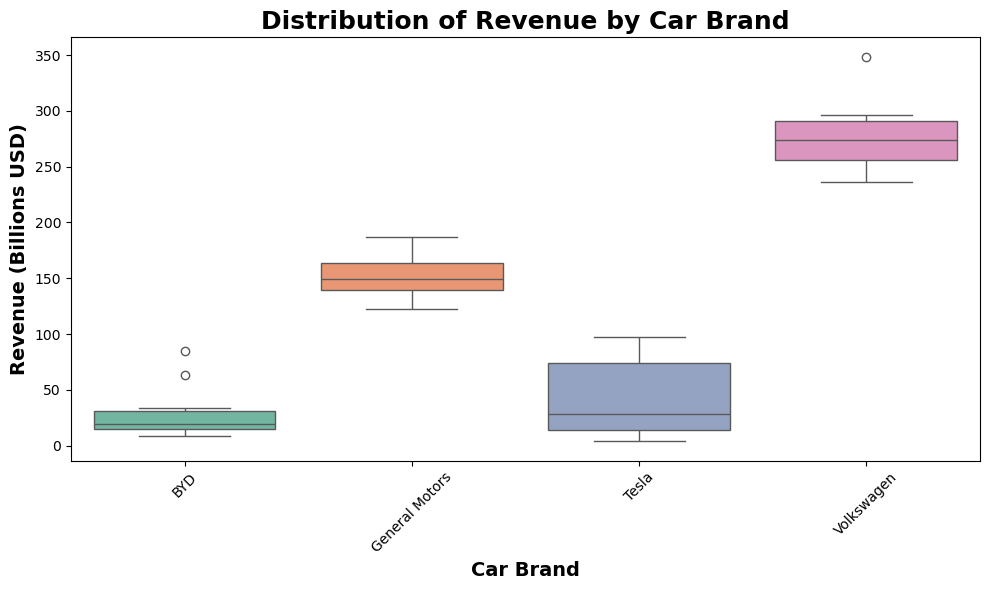

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Car', y='Revenue', data=main_df, palette='Set2', hue='Car')
plt.title('Distribution of Revenue by Car Brand', fontsize=18, fontweight='bold')
plt.xlabel('Car Brand', fontsize=14, fontweight='bold')
plt.ylabel('Revenue (Billions USD)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Liquidity and Goodwill  Correlations

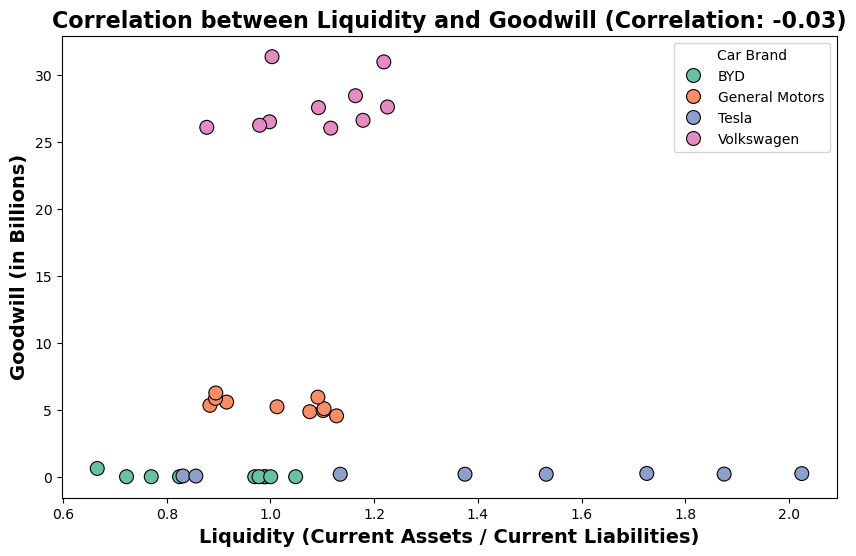

Pearson correlation between Liquidity and Goodwill: -0.03


In [ ]:
main_df['Total current assets'] = pd.to_numeric(main_df['Total current assets'], errors='coerce')
main_df['Total current liabilities'] = pd.to_numeric(main_df['Total current liabilities'], errors='coerce')
main_df['Liquidity'] = main_df['Total current assets'] / main_df['Total current liabilities']
correlation = main_df[['Liquidity', 'Goodwill']].corr().iloc[0, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Liquidity', y='Goodwill', data=main_df, hue='Car', palette='Set2', s=100, edgecolor='black')
plt.title(f'Correlation between Liquidity and Goodwill (Correlation: {correlation:.2f})', fontsize=16, fontweight='bold')
plt.xlabel('Liquidity (Current Assets / Current Liabilities)', fontsize=14, fontweight='bold')
plt.ylabel('Goodwill (in Billions)', fontsize=14, fontweight='bold')
plt.legend(title='Car Brand', loc='upper right')
plt.show()

print(f"Pearson correlation between Liquidity and Goodwill: {correlation:.2f}")

The correlation coefficient of -0.03 indicates a very weak negative correlation between the liquidity of the company and its goodwill. This result was unexpected because, intuitively, the liquidity of a company should have a positive influence on its reputability or goodwill. A company with stronger liquidity would typically be seen as more stable, which could improve its reputation in the market. However, the data does not support this expected relationship, suggesting that other factors may play a more significant role in determining a company's goodwill or reputation than liquidity alone.
